# Introduction

Halo! Salam kenal! Perkenalkan saya Kent Darren, lulusan Fakultas Ekonomi dan Bisnis dari Universitas Tarumanagara yang sedang mengincar pekerjaan sebagai seorang *Data Analyst*. Sejak kecil saya merupakan seorang anak yang menyukai angka dan berhitung, hobi dan ketertarikan ini saya sadari ketika saya berkesempatan belajar di Kumon. Dan pada saat duduk di bangku perkuliahan, saya menyadari ketertarikan saya mempelajari bahasa pemrograman ketika saya mengutak-atik Javascript untuk belajar membuat website. Saya sadar bahwa kedua ketertarikan saya ini sangat dibutuhkan sebagai *hard skill* dalam bidang *data analysis*, apalagi dengan bidang sarjana saya yang mempelajari tentang bisnis dan seluk-beluknya. Semenjak saat itu saya bertekad untuk menjadi seorang *Data Analyst*, karena saya yakin dengan ketertarikan dan kemampuan saya dapat membantu anda untuk mencari akar masalah dan memecahkannya!

# Disclaimer

Sampel data yang saya gunakan merupakan data fiksional yang menggambarkan penjualan dan keuntungan suatu perusahaan otomotif yang fiksional yang **tidak menggambarkan** situasi nyata. Sampel data ini saya ambil dari kursus *Coursera* yang menyediakan data tersebut untuk kerpeluan latihan dan pembelajaran. Tujuan saya menggunakan data fiksional tersebut hanya untuk menunjukkan kemampuan saya dalam melakukan proses analisis data menggunakan python.

Misalnya saya sedang bekerja di perusahaan XXX yang berindustri dibidang otomotif. Saya diberikan pekerjaan oleh atasan untuk:

1. Mencari ***Average Profit per Model***.

2. Mengecek ***Quarterly Sales Trend*** 2025.

3. Mengecek ***YoY Dealer Growth Rate***.

4. Memberikan **visualisasi data** untuk keperluan *Stakeholder's Meeting*.

### 1. Mengimpor dan Mengecek Data

Langkah awal yang saya lakukan adalah mengimpor data dari excel ke python untuk analisis dan visualisasi lebih lanjut. Setelah itu, saya juga mengecek data secara singkat untuk mengetahui size data yang telah diberikan.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

data = pd.read_excel('data/Total_Sales.xlsx')
data

,Year,Month,Date,Model,Dealer ID,Quantity Sold,Profit
0,2025,December,2025-12-01 23:00:00,Beaufort,1222,7,10506.0
1,2025,December,2025-12-01 23:00:00,Salish,1222,9,27529.0
2,2025,December,2025-12-01 23:00:00,Labrador,1222,12,9673.0
3,2025,December,2025-12-01 23:00:00,Champlain,1222,2,4620.0
4,2025,December,2025-12-01 23:00:00,Hudson,1222,16,8008.0
...,...,...,...,...,...,...,...
2995,2021,January,2021-01-01 23:00:00,Beaufort,1288,17,25577.0
2996,2021,January,2021-01-01 23:00:00,Salish,1288,22,67129.0
2997,2021,January,2021-01-01 23:00:00,Labrador,1288,26,20874.0
2998,2021,January,2021-01-01 23:00:00,Champlain,1288,5,11507.0


Yang saya perhatikan disini adalah:
- *Header* dari *column-column* yang ada = apa saja yang *field-field* yang terdapat di dalam data tersebut.

- Jumlah row = jadi saya mendapatkan *insight*, kira-kira seberapa besar data ini dan mencakup informasi apa saja.

### 2. Mengecek Tipe Data dan *Null-Value*

Langkah berikutnya adalah memeriksa tipe data dan nilai kosong (*null value*). Tahap ini merupakan bagian dari proses *data cleaning*, yang bertujuan untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai serta tidak terdapat data yang hilang atau kosong.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           3000 non-null   int64         
 1   Month          3000 non-null   object        
 2   Date           3000 non-null   datetime64[ns]
 3   Model          3000 non-null   object        
 4   Dealer ID      3000 non-null   int64         
 5   Quantity Sold  3000 non-null   int64         
 6   Profit         3000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 164.2+ KB


Yang saya perhatikan disini adalah:
- Memeriksa kolom *Non-Null Count* → Tujuannya adalah memastikan setiap kolom memiliki jumlah data *non-null* yang sama dan sesuai dengan total baris data. Jika semuanya cocok, berarti tidak ada data yang kosong. 

- Memeriksa tipe data setiap kolom → Semua kolom penting untuk dicek, tetapi saya akan lebih fokus pada kolom *Date* dan *Profit* untuk memastikan bahwa tipe data keduanya sudah benar sesuai fungsinya.

### 3. Mencari Rata-Rata *Profit* per Model

Langkah pertama yang akan saya lakukan adalah menghitung rata-rata *profit* untuk setiap model. Caranya, saya akan memisahkan data berdasarkan model, lalu menghitung rata-rata *profit* dari masing-masing kelompok model tersebut.

In [17]:
#membuat dataframe baru yang berisi rata-rata profit berdasarkan model
data['PPV'] = data['Profit'] / data['Quantity Sold']
avg_model_profit = data.groupby(['Model'])['PPV'].mean().reset_index().round(2)
avg_model_profit

,Model,PPV
0,Beaufort,1520.21
1,Champlain,2291.04
2,Hudson,564.19
3,Labrador,850.94
4,Salish,2998.37


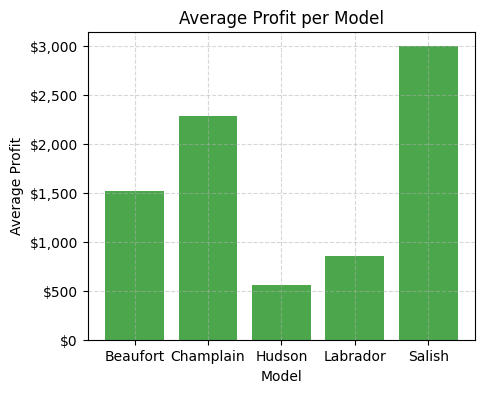

In [18]:
plt.figure(figsize=(5,4))
plt.bar(avg_model_profit['Model'], avg_model_profit['PPV'], color='green', alpha=0.7)

plt.title('Average Profit per Model')
plt.xlabel('Model')
plt.ylabel('Average Profit')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid( linestyle='--', alpha=0.5)
plt.show()

Dari visualisasi tersebut, terdapat 3 *insight*:

- Model Salish menghasilkan *profit* tertinggi, yaitu sekitar $3.000 per unit. 

- Model Beaufort dan Champlain masing-masing mencatatkan *profit* sekitar $1.500 dan $2.200 per unit. 

- Model Hudson dan Labrador memiliki *profit* paling rendah, yaitu sekitar $500 dan $800 per unit.


### 4. Mengecek *Quarterly Sales Trend*
Seperti yang sudah diketahui, untuk menganalisis tren penjualan per kuartal *(quarterly trend)*, data penjualan tahunan perlu dibagi menjadi empat periode: Q1 hingga Q4. Langkah pertama yang akan saya lakukan adalah membagi data penjualan berdasarkan kuartal agar bisa dilakukan perbandingan antarperiode. Dalam analisis ini, saya akan menggunakan data satu tahun terakhir untuk membandingkan tren penjualan tahun ini dengan tahun sebelumnya. Sebagai metrik utama, saya akan menggunakan *'Quantity Sold’* untuk melihat dan membandingkan performa penjualan di setiap kuartal.

In [19]:
# menambahkan column quarter yang sesuai dengan bulan penjualan
data['Quarter'] = data['Date'].dt.to_period('Q').astype(str)

# membuat dataframe baru yang berisi total quantity sold per quarter di tahun 2024 dan 2025
quarterly_sales_trend = data.groupby('Quarter')[['Quantity Sold']].sum().reset_index().round(2)
quarterly_sales_trend = quarterly_sales_trend[quarterly_sales_trend['Quarter'].str.startswith(('2024', '2025'))]
quarterly_sales_trend

,Quarter,Quantity Sold
12,2024Q1,2638
13,2024Q2,2966
14,2024Q3,2542
15,2024Q4,2487
16,2025Q1,2731
17,2025Q2,3061
18,2025Q3,2609
19,2025Q4,2563


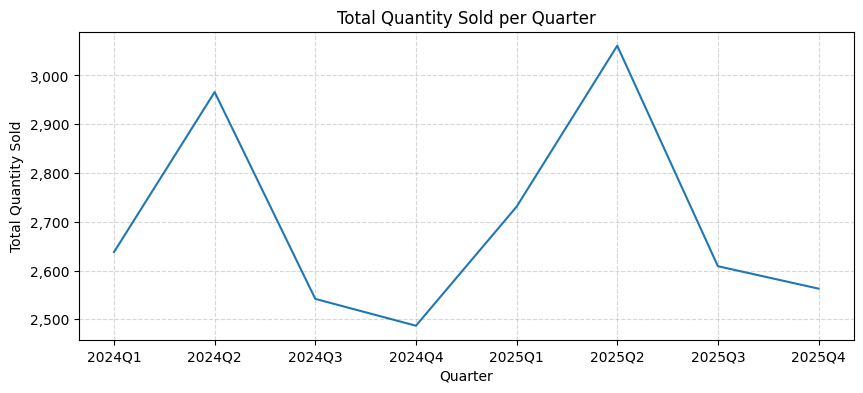

In [20]:
plt.figure(figsize=(10,4))
plt.plot(quarterly_sales_trend['Quarter'], quarterly_sales_trend['Quantity Sold'])

plt.title('Total Quantity Sold per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.grid(linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

Dari visualisasi tersebut, terdapat 3 *insight*:

- Penjualan tertinggi terjadi pada kuartal kedua (Q2), sedangkan penjualan terendah terdapat pada kuartal keempat (Q4). 

- Pada tahun 2025, jumlah penjualan mengalami peningkatan sekitar 100 unit per kuartal dibandingkan dengan tahun 2024. 

- Pola penjualan per kuartal menunjukkan kecenderungan yang konsisten dari tahun ke tahun, menandakan adanya pola musiman yang stabil.

### 5. Mengecek *YoY Dealer Growth Rate*

Untuk menghitung *growth rate* per dealer, langkah pertama yang akan saya lakukan adalah menentukan total *profit* setiap dealer per tahun. Setelah itu, saya akan membandingkan *profit* tahun berjalan dengan *profit* tahun sebelumnya untuk memperoleh *growth rate* tahunan masing-masing dealer. Saya memilih menggunakan metrik *profit*, karena *profit* merupakan indikator yang dapat secara langsung mencerminkan tingkat performa sebuah perusahaan.

In [21]:
dealer_yoy = data.groupby(['Dealer ID', 'Year'])['Profit'].sum().reset_index()
dealer_yoy['Growth'] = dealer_yoy.groupby('Dealer ID')['Profit'].pct_change().fillna(0).round(4) * 100
dealer_yoy.head(10)

,Dealer ID,Year,Profit,Growth
0,1212,2021,1484358.00,0.00
1,1212,2022,1578889.00,6.37
2,1212,2023,1649402.00,4.47
3,1212,2024,1445739.00,-12.35
4,1212,2025,1441584.00,-0.29
5,1215,2021,1592741.00,0.00
6,1215,2022,1680542.00,5.51
7,1215,2023,1762536.00,4.88
8,1215,2024,1549374.25,-12.09
9,1215,2025,1542790.00,-0.42


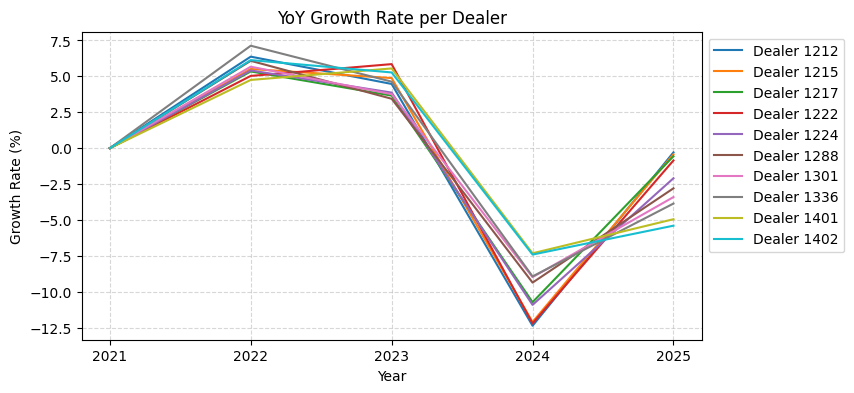

In [22]:
plt.figure(figsize=(8,4))

for dealer in dealer_yoy['Dealer ID'].unique():
    dealer_data = dealer_yoy[dealer_yoy['Dealer ID'] == dealer]
    plt.plot(dealer_data["Year"].astype('str'), dealer_data['Growth'], label=f'Dealer {dealer}')
plt.title('YoY Growth Rate per Dealer')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid( linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Saya rasa visualisasi tersebut terlalu ramai dan sulit untuk dianalisis. Jadi saya akan membuat visualisasi yang lebih sederhana dengan mengambil rata-rata *growth rate* dari setiap dealer.

In [23]:
# menghitung rata-rata growth rate per dealer
dealer_avg_growth = dealer_yoy.groupby('Dealer ID').agg({'Growth':'mean'}).round(2)
dealer_avg_growth

,Growth
Dealer ID,
1212,-0.36
1215,-0.42
1217,-0.45
1222,-0.43
1224,-0.74
1288,-0.52
1301,-0.59
1336,-0.20
1401,-0.39


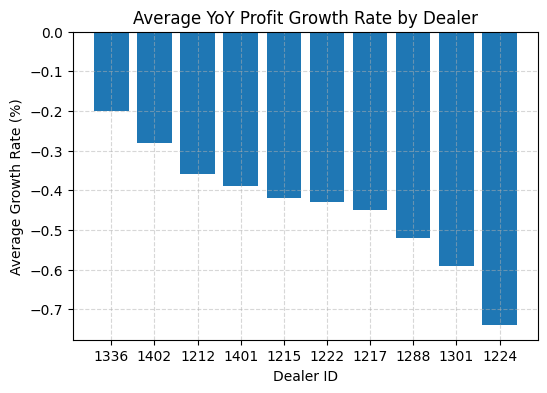

In [24]:
dealer_avg_growth = dealer_avg_growth.sort_values(by='Growth', ascending=False)

plt.figure(figsize=(6,4))

plt.bar(dealer_avg_growth.index.astype('str'), dealer_avg_growth['Growth'])
plt.title('Average YoY Profit Growth Rate by Dealer')
plt.xlabel('Dealer ID')
plt.ylabel('Average Growth Rate (%)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Dari visualisasi tersebut, terdapat 3 *insight*:

- Seluruh dealer mengalami pertumbuhan negatif.

- Dealer 1336 mencatat penurunan rata-rata paling kecil, yaitu sekitar -0,2%, sedangkan Dealer 1224 mengalami penurunan rata-rata terbesar, yaitu sekitar -0,7%.

- Secara keseluruhan, penjualan pada tahun 2024 menunjukkan penurunan yang cukup signifikan.